## Классификаторы библиотеки scikit-learn на Python на примере ирисов

Классификаторы библиотеки scikit-learn рассматриваются на задаче классификации ирисов Фишера-Андерсона, описание которых дано в виде набора из данных о 150 экземплярах ириса, по 50 экземпляров из трех следующих видов:

* ирис щетинистый (iris setosa);
* ирис версиколор (iris versicolor);
* ирис виргинский (iris virginica).

![iris.png](attachment:iris.png)

 
 
Для каждого экземпляра приведены 4 следующие характеристики (в см.):

* длина чашелистика – отдельной части чашечки цветка (sepal length);
* ширина чашелистика (sepal width);
* длина лепестка (petal length).
* ширина лепестка (petal width). 

На основании этого набора данных требуется построить правило классификации, определяющее класс растения.


In [3]:
#Импортируем нужные библиотеки:

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import linear_model
from sklearn.cluster import KMeans
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import metrics
from pandas import DataFrame

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Загружаем набор данных Ирисы:
iris = datasets.load_iris()

In [5]:
# Смотрим на названия переменных
print (iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Смотрим на данные, выводим 10 первых строк:
print (iris.data[:10])



[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [7]:
# Смотрим на целевую переменную:
print (iris.target_names)
print (iris.target)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
iris_frame = DataFrame(iris.data)
# Делаем имена колонок такие же, как имена переменных:
iris_frame.columns = iris.feature_names
# Добавляем столбец с целевой переменной:
iris_frame['target'] = iris.target
# Для наглядности добавляем столбец с сортами:
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
# Смотрим, что получилось:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### Дескриптивная статистика

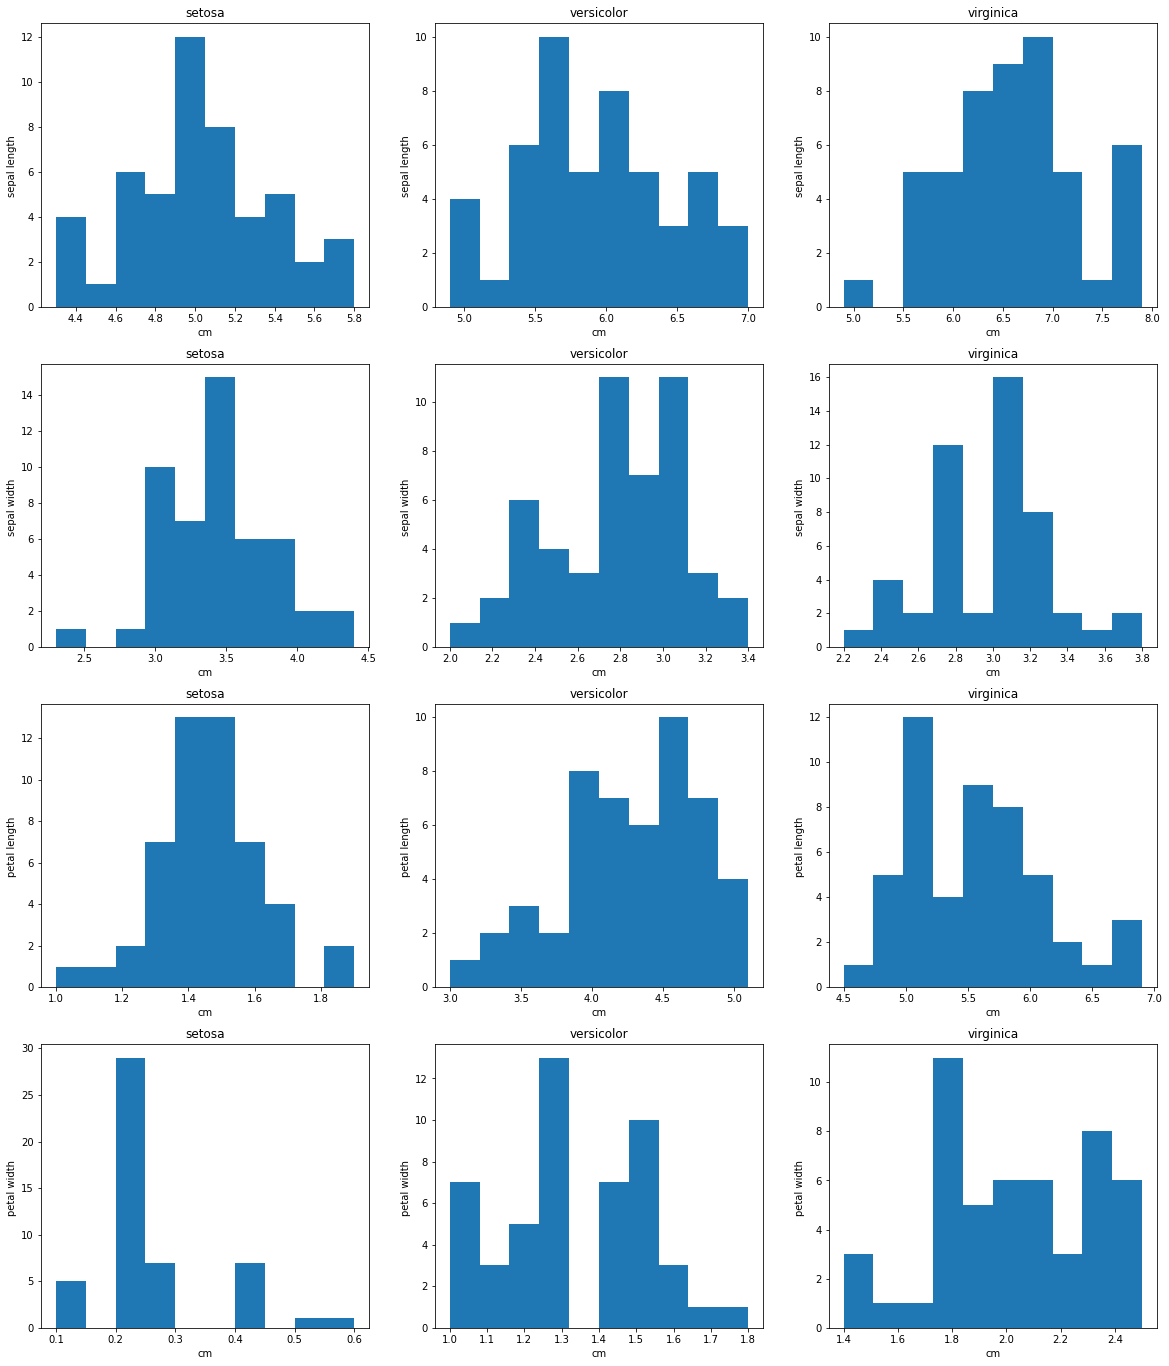

In [9]:
# Строим гистограммы по каждому признаку:
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

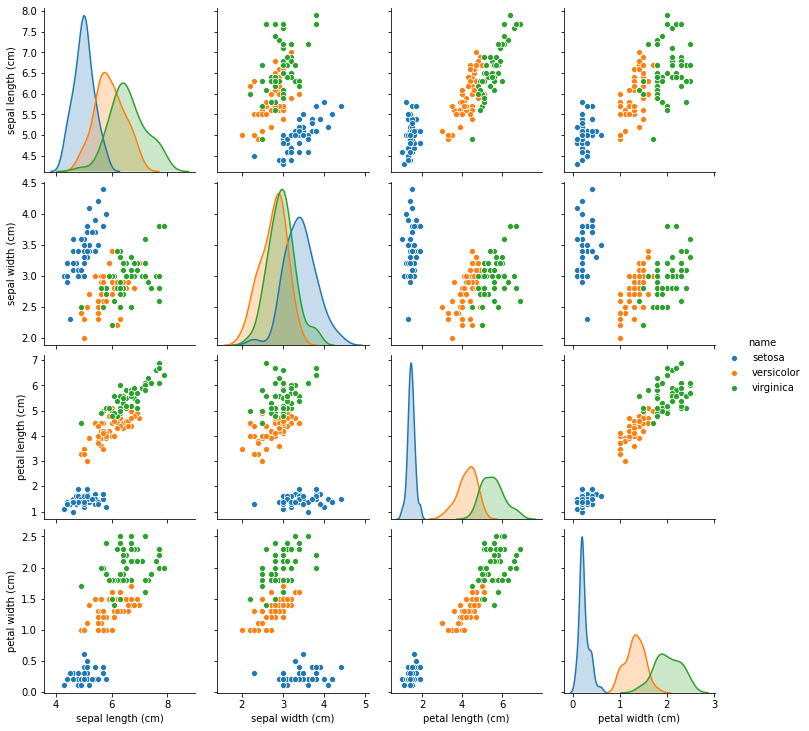

In [10]:
import seaborn as sns
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], 
             hue = 'name')

In [11]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


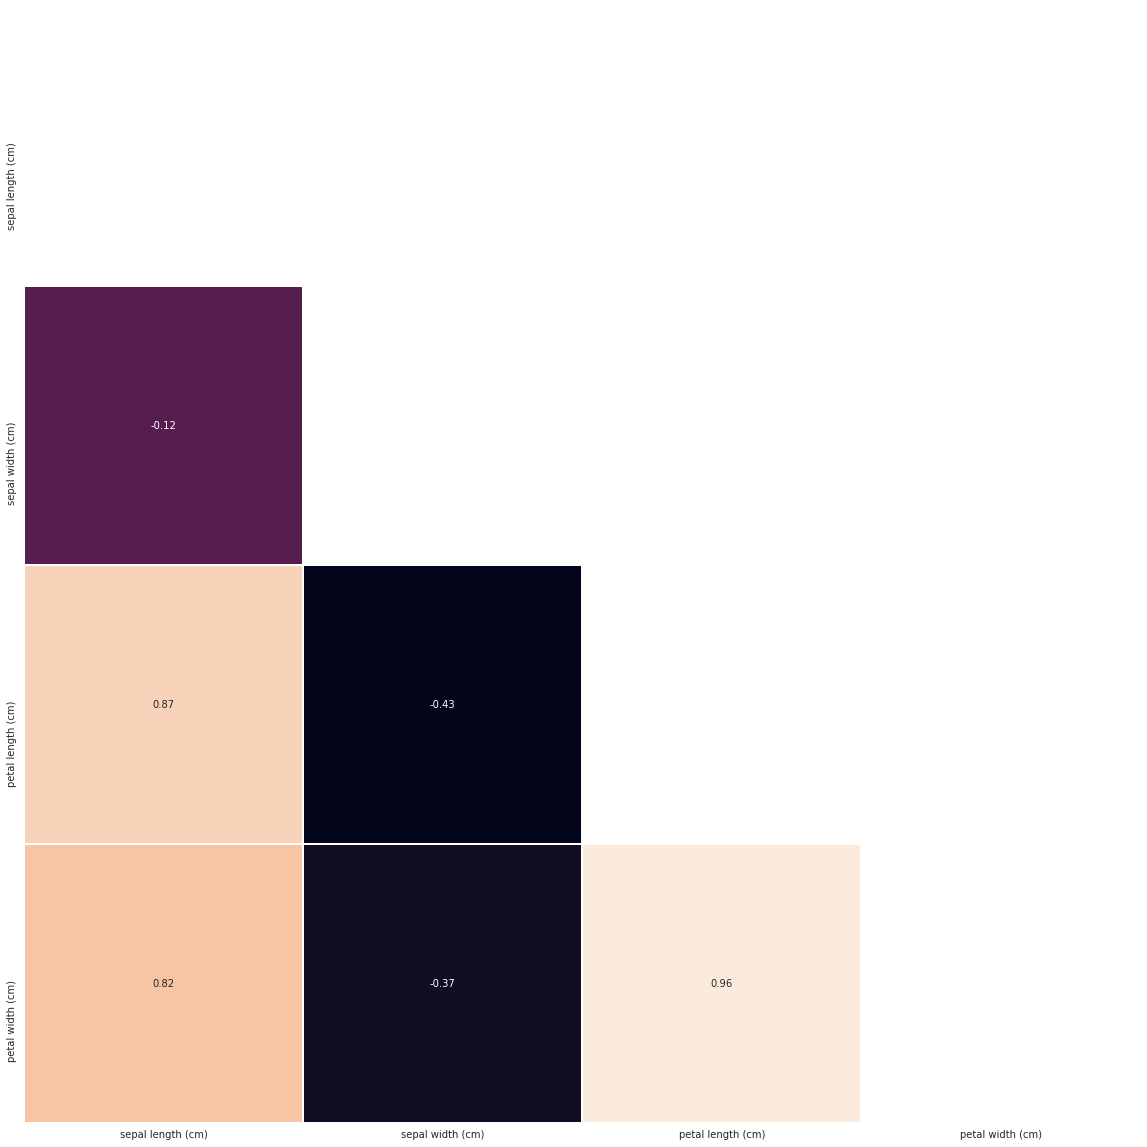

In [12]:
import seaborn as sns
corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)


#### Отбор признаков

В первом приближении можно просто включить все переменные в модель и посмотреть что будет. 

Далее можно подумать, какие признаки убрать, а какие создать.

#### Данные для обучения и тестовые данные

Разделяем данные на данные для обучения и тестовые данные. Обычно выборку разделяют на обучающую и тестовую в процентном соотношении 66/33 или 70/30 или 80/20. Возможны и другие разбиения в зависимости от данных. В нашем примере на тестовые данные отводим 30% от всей выборки (параметр test_size = 0.3):

In [13]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['sepal length (cm)',
                'sepal width (cm)',
                'petal length (cm)',
                'petal width (cm)']], 
    iris_frame['target'], test_size = 0.3, random_state = 0)

# смотрим что все правильно:

print (train_data)
print (test_data)
print (train_labels)
print (test_labels)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
116                6.5               3.0                5.5               1.8
144                6.7               3.3                5.7               2.5
119                6.0               2.2                5.0               1.5
108                6.7               2.5                5.8               1.8
..                 ...               ...                ...               ...
9                  4.9               3.1                1.5               0.1
103                6.3               2.9                5.6               1.8
67                 5.8               2.7                4.1               1.0
117                7.7               3.8                6.7               2.2
47                 4.6               3.2                1.4               0.2

[105 rows x 4 columns]
     sepal length (cm)  sepal width (cm)

### Построение модели
#### Линейная регрессия

In [14]:
from scipy import polyval, stats
fit_output = stats.linregress(iris_frame[['petal length (cm)','petal width (cm)']])
slope, intercept, r_value, p_value, slope_std_error = fit_output
print(slope, intercept, r_value, p_value, slope_std_error)

0.41575541635241114 -0.36307552131902776 0.9628654314027963 4.6750039073255014e-86 0.009582435790766206


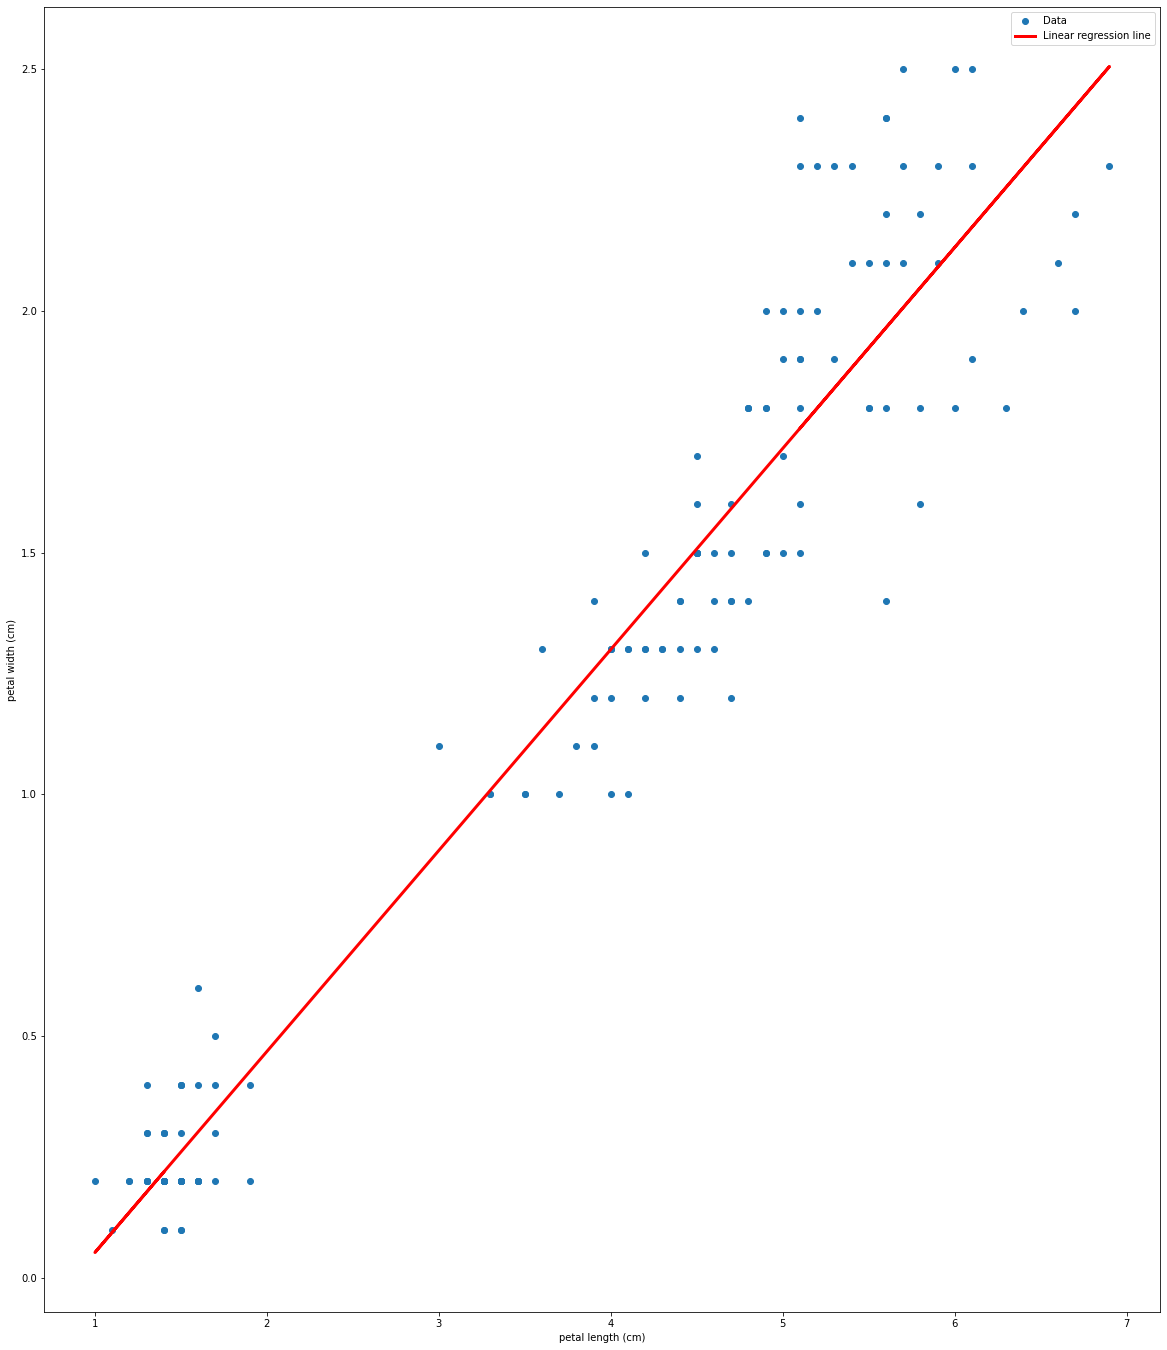

In [15]:
import matplotlib.pyplot as plt

plt.plot(iris_frame[['petal length (cm)']], iris_frame[['petal width (cm)']],'o', label='Data')

plt.plot(iris_frame[['petal length (cm)']], intercept + slope*iris_frame[['petal length (cm)']], 'r', linewidth=3, label='Linear regression line')

plt.ylabel('petal width (cm)')

plt.xlabel('petal length (cm)')

plt.legend()

plt.show()

### Классификация

In [16]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)

model.fit(train_data, train_labels)
model_predictions = model.predict(test_data)

print (metrics.accuracy_score(test_labels, model_predictions))

print (metrics.classification_report(test_labels, model_predictions))

0.8444444444444444
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.72      1.00      0.84        18
           2       1.00      0.36      0.53        11

    accuracy                           0.84        45
   macro avg       0.91      0.79      0.79        45
weighted avg       0.89      0.84      0.82        45



####   Cross-Validation

In [17]:
from sklearn.model_selection import cross_val_score
model = linear_model.SGDClassifier(alpha=0.001, max_iter=100, random_state = 0)
scores = cross_val_score(model, train_data, train_labels, cv=5)
print (scores.mean())

0.7904761904761906


#### Подбор оптимальных параметров

In [18]:
from sklearn.model_selection import GridSearchCV

parameters_grid = {'max_iter' : range(5,25), 'alpha' : np.linspace(0.0001, 0.001, num = 10)}

classifier = linear_model.SGDClassifier(random_state = 0)
seed = 5

grid_cv = GridSearchCV(classifier, parameters_grid, scoring = 'accuracy', cv = seed)
grid_cv.fit(train_data, train_labels)

print (grid_cv.best_estimator_)

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

SGDClassifier(alpha=0.0009, max_iter=17, random_state=0)


/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

In [19]:
print (grid_cv.best_estimator_)

SGDClassifier(alpha=0.0009, max_iter=17, random_state=0)


In [20]:
scores = cross_val_score(grid_cv.best_estimator_, train_data, train_labels, cv=5)
print (scores.mean())

0.9619047619047618


/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider in

# Задание

"Закончить исследование"
1. Осуществить отбор признаков
2. Осуществить стандартизацию данных
3. Исследовать качество следующих алгоритмов:
    * SGD Classifier (SGD) - Линейный классификатор с SGD-обучением (stochastic gradient descent - стохастический градиентный спуск)
    * Support Vector Machines (SVM) - Метод опорных векторов.
    * Random Forest Classifier (RF) - Случайный лес (используются деревья решений).
    * Gaussian process classification (GP) - Гауссовская классификация (основана на аппроксимации Лапласа).
    * Decision tree classifier (DT) - Дерево решений (http://scikit-learn.org/stable/modules/tree.html).
    * Logistic Regression (LR) - Логистическая регрессия.
    * Gaussian Naive Bayes (NB) - Гауссовский наивный байесовский классификатор.
    * MLP (Multi-layer Perceptron) Classifier (MLP) - Многослойный перцептрон.
    * K-Nearest Neighbors (KNN) - Метод K-ближайших соседей.
    * Quadratic Discriminant Analysis (QDA) - Квадратичный дискриминантный анализ.
    * Linear Discriminant Analysis (LDA) - Линейный дискриминантный анализ. 

4. Провести исследование по этой схеме для одного из набора данных
    * load_wine(\*[, return_X_y, as_frame]) Load and return the wine dataset (classification).
    * load_breast_cancer(\*[, return_X_y, as_frame]) Load and return the breast cancer wisconsin dataset (classification).
    * "титаник"


In [21]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [22]:
part_train_data, part_test_data, part_train_labels, part_test_labels = train_test_split(
    iris_frame[['sepal length (cm)',
                'sepal width (cm)',
                'petal length (cm)']], 
    iris_frame['target'], test_size = 0.3, random_state = 0)

task1 = make_pipeline(StandardScaler(),
                      SGDClassifier(max_iter=1500, tol=1e-3))
scores = cross_val_score(task1, part_train_data, part_train_labels, cv=10)
print(scores.mean())

print(np.sum(task1.fit(part_train_data, part_train_labels).predict(part_test_data)==part_test_labels)/len(part_test_labels))

0.8863636363636364
0.9111111111111111


In [23]:

task3_1 = make_pipeline(StandardScaler(),
                        SGDClassifier(max_iter=1500, tol=1e-3))
scores = cross_val_score(task3_1, train_data, train_labels, cv=10)
print(scores.mean())

print(np.sum(task3_1.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.8963636363636365
0.9555555555555556


In [24]:
task3_2 = make_pipeline(StandardScaler(),
                        svm.SVC())
scores = cross_val_score(task3_2, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_2.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9427272727272727
0.9777777777777777


In [25]:
task3_3 = make_pipeline(StandardScaler(),
                        RandomForestClassifier(max_depth=2))
scores = cross_val_score(task3_3, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_3.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9518181818181818
0.9777777777777777


In [26]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)

task3_4 = make_pipeline(StandardScaler(),
                       GaussianProcessClassifier(kernel=kernel, random_state=0))
scores = cross_val_score(task3_4, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_4.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9427272727272727
0.9777777777777777


In [27]:
from sklearn import tree

task3_5 = make_pipeline(StandardScaler(),
                        tree.DecisionTreeClassifier())
scores = cross_val_score(task3_5, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_5.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.941818181818182
0.9777777777777777


In [28]:
from sklearn.linear_model import LogisticRegression

task3_6 = make_pipeline(StandardScaler(),
                        LogisticRegression())
scores = cross_val_score(task3_6, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_6.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9427272727272727
0.9777777777777777


In [29]:
from sklearn.naive_bayes import GaussianNB

task3_7 = make_pipeline(StandardScaler(),
                        GaussianNB())
scores = cross_val_score(task3_7, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_7.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9436363636363636
1.0


In [30]:
from sklearn.neural_network import MLPClassifier

task3_8 = make_pipeline(StandardScaler(),
                        MLPClassifier())
scores = cross_val_score(task3_8, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_8.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer:

0.9427272727272727
0.9777777777777777


/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

task3_9 = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=3))
scores = cross_val_score(task3_9, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_9.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9236363636363636
0.9777777777777777


In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

task3_10 = make_pipeline(StandardScaler(),
                         QuadraticDiscriminantAnalysis())
scores = cross_val_score(task3_10, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_10.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9800000000000001
0.9777777777777777


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

task3_11 = make_pipeline(StandardScaler(),
                         LinearDiscriminantAnalysis())
scores = cross_val_score(task3_11, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_11.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9809090909090911
0.9777777777777777


In [34]:
from  sklearn.datasets import load_breast_cancer
DatasetTask = load_breast_cancer()

In [35]:
print (DatasetTask.feature_names)
print (DatasetTask.target_names)
print (DatasetTask.target)

data_frme = DataFrame(DatasetTask.data)
# Делаем имена колонок такие же, как имена переменных:
data_frme.columns = DatasetTask.feature_names
# Добавляем столбец с целевой переменной:
data_frme['target'] = DatasetTask.target
# Для наглядности добавляем столбец с сортами:
data_frme['name'] = data_frme.target.apply(lambda x : DatasetTask.target_names[x])
# Смотрим, что получилось:
data_frme

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [37]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(
    data_frme[['mean radius','mean texture', 'mean perimeter', 'mean area',
 'mean smoothness', 'mean compactness', 'mean concavity',
 'mean concave points', 'mean symmetry' ,'mean fractal dimension',
 'radius error' ,'texture error', 'perimeter error', 'area error',
 'smoothness error', 'compactness error', 'concavity error',
 'concave points error', 'symmetry error', 'fractal dimension error',
 'worst radius' ,'worst texture', 'worst perimeter' ,'worst area',
 'worst smoothness', 'worst compactness' ,'worst concavity',
 'worst concave points', 'worst symmetry' ,'worst fractal dimension']], 
    data_frme['target'], test_size = 0.3, random_state = 0)

# смотрим что все правильно:

print (train_data)
print (test_data)
print (train_labels)
print (test_labels)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
478       11.490         14.59           73.99      404.9          0.10460   
303       10.490         18.61           66.86      334.3          0.10680   
155       12.250         17.94           78.27      460.3          0.08654   
186       18.310         18.58          118.60     1041.0          0.08588   
101        6.981         13.43           43.79      143.5          0.11700   
..           ...           ...             ...        ...              ...   
277       18.810         19.98          120.90     1102.0          0.08923   
9         12.460         24.04           83.97      475.9          0.11860   
359        9.436         18.32           59.82      278.6          0.10090   
192        9.720         18.22           60.73      288.1          0.06950   
559       11.510         23.93           74.52      403.5          0.09261   

     mean compactness  mean concavity  mean concave points  mea

In [39]:
task3_1 = make_pipeline(StandardScaler(),
                        SGDClassifier(max_iter=1500, tol=1e-3))
scores = cross_val_score(task3_1, train_data, train_labels, cv=10)
print(scores.mean())

print(np.sum(task3_1.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9622435897435897
0.9532163742690059


In [40]:
task3_2 = make_pipeline(StandardScaler(),
                        svm.SVC())
scores = cross_val_score(task3_2, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_2.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9800000000000001
0.9766081871345029


In [41]:
task3_3 = make_pipeline(StandardScaler(),
                        RandomForestClassifier(max_depth=2))
scores = cross_val_score(task3_3, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_3.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9398076923076923
0.9532163742690059


In [42]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
kernel = 1.0 * RBF(1.0)

task3_4 = make_pipeline(StandardScaler(),
                       GaussianProcessClassifier(kernel=kernel, random_state=0))
scores = cross_val_score(task3_4, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_4.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9774358974358973
0.9590643274853801


In [43]:
from sklearn import tree

task3_5 = make_pipeline(StandardScaler(),
                        tree.DecisionTreeClassifier())
scores = cross_val_score(task3_5, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_5.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9146794871794872
0.9122807017543859


In [44]:
from sklearn.linear_model import LogisticRegression

task3_6 = make_pipeline(StandardScaler(),
                        LogisticRegression())
scores = cross_val_score(task3_6, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_6.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.985
0.9766081871345029


In [45]:
from sklearn.naive_bayes import GaussianNB

task3_7 = make_pipeline(StandardScaler(),
                        GaussianNB())
scores = cross_val_score(task3_7, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_7.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9347435897435897
0.9122807017543859


In [46]:
from sklearn.neural_network import MLPClassifier

task3_8 = make_pipeline(StandardScaler(),
                        MLPClassifier())
scores = cross_val_score(task3_8, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_8.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer:

0.9748717948717948
0.9590643274853801


/home/max/main/univ/NN_subject/venvlast/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
from sklearn.neighbors import KNeighborsClassifier

task3_9 = make_pipeline(StandardScaler(),
                        KNeighborsClassifier(n_neighbors=3))
scores = cross_val_score(task3_9, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_9.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9647435897435898
0.935672514619883


In [48]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

task3_10 = make_pipeline(StandardScaler(),
                         QuadraticDiscriminantAnalysis())
scores = cross_val_score(task3_10, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_10.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))

0.9547435897435899
0.9532163742690059


In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

task3_11 = make_pipeline(StandardScaler(),
                         LinearDiscriminantAnalysis())
scores = cross_val_score(task3_11, train_data, train_labels, cv=10)
print(scores.mean())
print(np.sum(task3_11.fit(train_data, train_labels).predict(test_data)==test_labels)/len(test_labels))



0.9548076923076924
0.9707602339181286
